In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
nclasses = [10, 30, 75, 150, 275, 345]

means = {
"DANN" : [5.42, 7.50, 9.72, 6.72, 5.12, 4.32],
"MSTN" : [7.34, 12.93, 9.68, 0.85, -10.38, -14.36],
"SAFN" : [10.5, 13.43, 8.99, 4.51, -0.87, -3.50],
"MCD" : [9.04, 7.51, -0.14, -3.00, -5.36, -5.27],
"CAN" : [9.53, 13.94, 7.40, 3.43, 0.51, -0.41],
"MemSAC" : [9.80, 12.15, 15.24, 15.68, 14.69, 12.73],
"CDAN" : [4.68, 11.21, 13.13, 11.60, 8.85, 8.54],
"FixBi" : [6.54, 12.69, 13.99, 12.44, 10.66, 9.57],
"ILA" : [5.61, 12.22, 10.55, 8.64, 5.01, 2.99],
}

std = {
"DANN" : [2.59, 2.06, 1.52, 1.33, 0.43, 0.00],
"MSTN" : [1.76, 2.34, 1.03, 1.01, 0.68, 0.00],
"SAFN" : [1.97, 3.74, 2.59, 1.30, 0.79, 0.00],
"MCD" : [2.37, 1.88, 1.33, 0.62, 0.87, 0.00],
"CAN" : [4.49, 2.88 ,1.27 ,1.73 ,0.99 ,0.00],
"MemSAC" : [2.15, 2.25, 0.69, 1.19, 0.96, 0.00],
"CDAN" : [2.87, 2.17, 0.71, 0.62, 0.64, 0.00],
"FixBi" : [3.03, 2.58, 0.99, 0.85, 0.32, 0.00],
"ILA" : [3.03, 2.58, 0.99, 0.85, 0.32, 0.00]
    
}

ordered_method = ["FixBi","ILA", "CDAN", "DANN", "SAFN","MCD","CAN"]
# ordered_method = ["ILA","CAN","MCD","SAFN","MSTN","DANN"]

# tags = {"CAN":"TPAMI'20", "MSTN":"ICML'18", "CDAN":"NIPS'17", "FixBi":"CVPR'21", "ILA":"CVPR'21"}

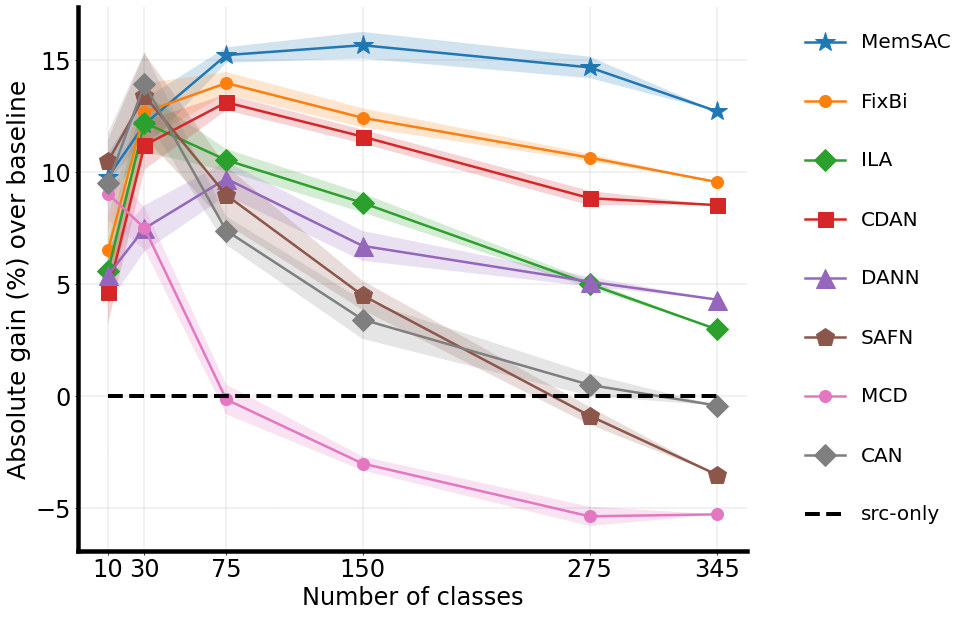

In [10]:
plt.figure(figsize=(12,10))

markers = ["." , "D" , "s" , "^" , "p"]*2
ms = [24, 15, 15, 19, 19]*2
lw=2.5
# ms=20.

mean_acc = np.array(means["MemSAC"])
std_acc = np.array(std["MemSAC"])/2.
plt.plot(nclasses, mean_acc, linewidth=lw, marker="*", markersize=20, label="MemSAC")
ax = plt.gca()
ax.fill_between(nclasses, mean_acc+std_acc, mean_acc-std_acc, alpha=0.2)

for ii , (method) in enumerate(ordered_method):
    if method != "MemSAC":
        accs = means[method]
        mean_acc = np.array(accs)
        std_acc = np.array(std[method])/2.
#         lbl = "%s(%s)"%(str(method), tags[method])
        lbl = "%s"%(str(method))
        plt.plot(nclasses, mean_acc, linewidth=lw, marker=markers[ii], markersize=ms[ii], label=lbl)
        ax = plt.gca()
        ax.fill_between(nclasses, mean_acc+std_acc, mean_acc-std_acc, alpha=0.2)

plt.plot(nclasses, [0]*len(nclasses), "k--", label="src-only", linewidth=4.)

# plt.text(300, 11.03, s="+12.73%", fontsize=20, weight="bold")


plt.xticks(nclasses, fontsize=24)
plt.yticks(fontsize=24)
plt.grid(which="major", color="black", linestyle='--', linewidth=0.15)

plt.xlabel("Number of classes", fontsize=24)
plt.ylabel("Absolute gain (%) over baseline", fontsize=25)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(4.5)
ax.spines['bottom'].set_linewidth(4.5)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.legend(fontsize=20, ncol=1, frameon=False, fancybox=True, loc="right"
                       , bbox_to_anchor=(1.33, .5), labelspacing=2.)

# bbox_to_anchor=(0.5, 1.12)

plt.savefig("intro_fig.pdf", format='pdf', bbox_inches='tight')

# plt.arrow(350 , 0 , 0 , 12, head_starts_at_zero=True, width=1, head_width=6, head_length=1., color="green" )

plt.show()

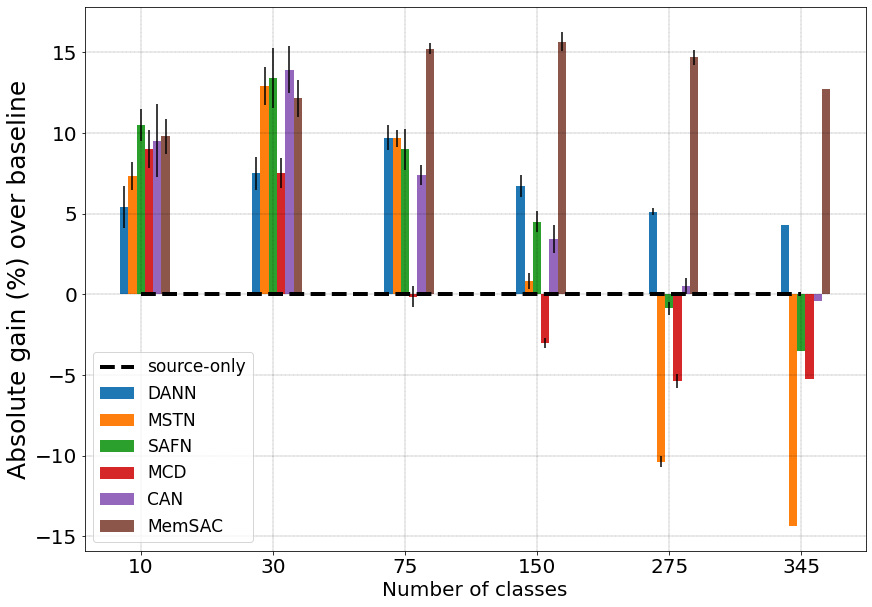

In [32]:
plt.figure(figsize=(14,10))
nclasses = list(range(0,480,80))

plt.plot(nclasses , [0]*len(nclasses), "k--", label="source-only", linewidth=4.)

for i , (method, accs) in enumerate(means.items()):
    mean_acc = np.array(accs)
    std_acc = np.array(std[method])/2.
    offset = 5*(i-2)
    plt.bar(np.array(nclasses)+offset, mean_acc, width=5., yerr=std_acc, label=str(method))
#     ax = plt.gca()
#     ax.fill_between(nclasses, mean_acc+std_acc, mean_acc-std_acc, alpha=0.2)

plt.legend(fontsize=17)

plt.xticks(nclasses, [10,30,75,150,275,345], fontsize=20)
plt.yticks(fontsize=20)
plt.grid(which="major", color="black", linestyle='--', linewidth=0.25)

plt.xlabel("Number of classes", fontsize=20)
plt.ylabel("Absolute gain (%) over baseline", fontsize=25)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(4.5)
ax.spines['bottom'].set_linewidth(4.5)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# plt.savefig("intro_fig.pdf", format='pdf', dpi=1200, bbox_inches='tight')

# plt.arrow(350 , 0 , 0 , 12, head_starts_at_zero=True, width=1, head_width=6, head_length=1., color="green" )

plt.show()

In [5]:
mean_acc

array([ 4.8 , 12.15, 15.24, 15.68, 14.69, 12.73])

In [6]:
std_acc

array([1.075, 1.125, 0.345, 0.595, 0.48 , 0.   ])

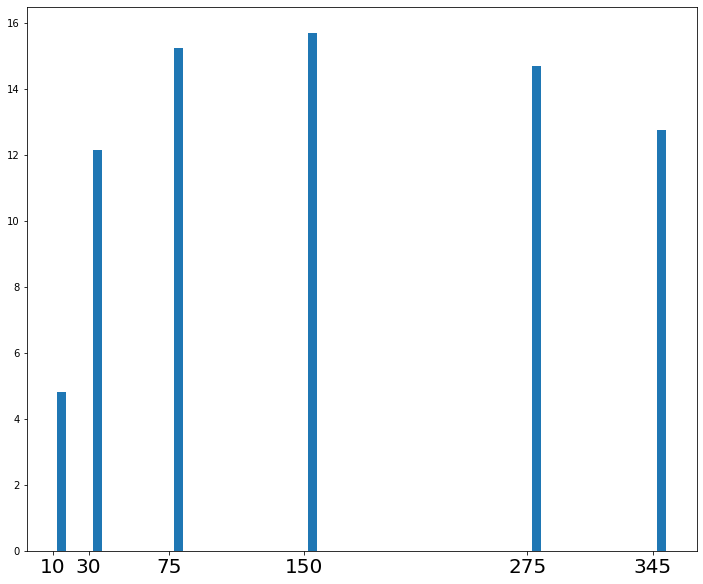

In [14]:
plt.figure(figsize=(12,10))
plt.bar(np.array(nclasses)+5, mean_acc, width=5)
plt.xticks(nclasses, fontsize=20)
plt.show()

In [15]:
plt.bar?

In [18]:
ar = [10,20,50,75,100]
oln = [16.4,20.4,24.5,25.9, 26.6]
ours = [9.6, 15.9, 24.2, 27.4, 29.4]

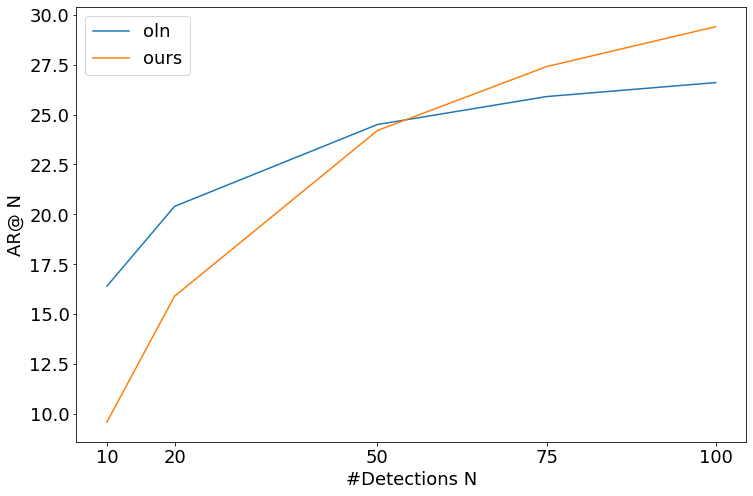

In [19]:
plt.figure(figsize=(12,8))

plt.plot(ar,oln, label="oln")
plt.plot(ar, ours, label="ours")

plt.legend(fontsize=18)

plt.xlabel("#Detections N", fontsize=18)
plt.ylabel("AR@ N", fontsize=18)

plt.xticks(ar, fontsize=18)
plt.yticks(fontsize=18)

plt.show()

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
kvals = [1, 3, 5, 20, 100, 500]

rc = [53.95, 54.1, 54.3, 54.1, 52.1, 50.6]
rc_pl = [52.63]*len(rc)

sp = [44.2, 44.05, 44.56, 44.27, 44.20, 42.20]
sp_pl = [42.87]*len(sp)

avg = [46.96, 47.22, 47.26, 46.95, 45.52, 43.25]
avg_pl = [44.81]*len(avg)

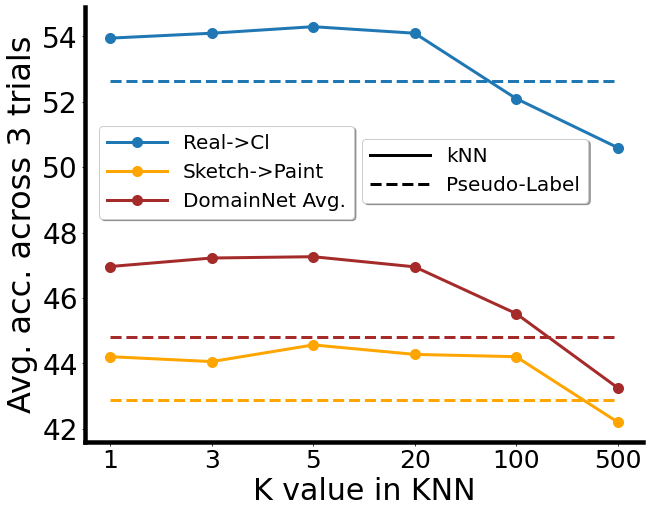

In [6]:
fig = plt.figure(figsize=(10,8))
ax = plt.gca()

l1, = plt.plot(rc, label="Real->Cl", marker=".", color="#1f77b4", markersize=20, linewidth=3)
plt.plot(rc_pl, "--", linewidth=3, color="#1f77b4")

a1, = plt.plot([50]*2, label="kNN", marker=".", color="black", markersize=0.001, linewidth=0.001)
a2, = plt.plot([50]*2, "--", linewidth=0.001, color="black", label="Pseudo-Label")

l2, = plt.plot(sp, label="Sketch->Paint", marker=".", color="orange", markersize=20, linewidth=3)
plt.plot(sp_pl, "--", linewidth=3, color="orange")

l3, = plt.plot(avg, label="DomainNet Avg.", marker=".", color="brown", markersize=20, linewidth=3)
plt.plot(avg_pl, "--", linewidth=3, color="brown")

first_legend = plt.legend(handles=[l1,l2,l3], bbox_to_anchor=(0.5, 0.75),fontsize=20, shadow=True, loc="upper right", ncol=1, handlelength=3)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(4.5)
ax.spines['bottom'].set_linewidth(4.5)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

## ticks
plt.xticks(range(len(sp)), kvals, fontsize=25)
plt.yticks(fontsize=28)

# Add the legend manually to the current Axes.
ax_lg = plt.gca().add_artist(first_legend)

# Create another legend for the second line.
leg = plt.legend(handles=[a1, a2], fontsize=20, bbox_to_anchor=(0.92, 0.72), shadow=True, loc="upper right", ncol=1, handlelength=3)

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)
    legobj.set_markersize(20)


# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("K value in KNN", fontsize=30)
plt.ylabel("Avg. acc. across 3 trials", fontsize=32)

plt.savefig("AccvsK.pdf", format='pdf', dpi=1200, bbox_inches='tight')

plt.show()